In [1]:
from stock import Stock, Sheet

print(Stock(6, 5))

Stock: 6x5 @ (0, 0)


Stock: 5x4 @ (4, 5)
Stock: 9x2 @ (9, 7)
Stock: 2x1 @ (10, 9)
Stock: 5x5 @ (8, 2)


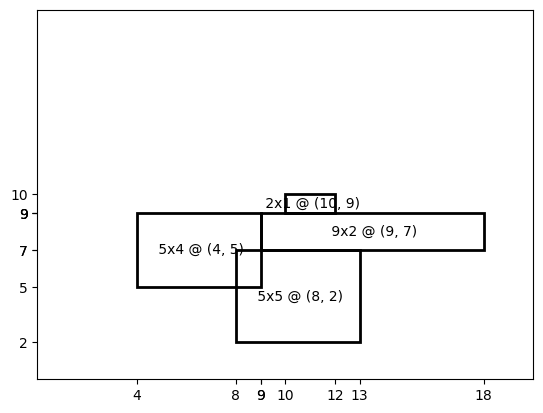

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# draw the rectangle in a canvas
def draw_rectangle(ax, x, y, width, height, color='black', lw=2, fill=False, text=None):
    ax.add_patch(plt.Rectangle((x, y), width, height, fill=fill, facecolor=color, lw=2))
    if text:
        ax.text(x + width / 2, y + height / 2, text, ha='center', va='center')

# draw the stock in a canvas
def draw_stock(ax, stock):
    draw_rectangle(ax, stock.x, stock.y, stock.width, stock.height, text=str(stock).split(':')[-1])


random = np.random.RandomState(409)
stocks = [Stock(*random.randint(10, size=4)+1) for i in range(4)]

fig, ax = plt.subplots()
for stock in stocks:
    print(stock)
    draw_stock(ax, stock)

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
# ax.axis('equal')
# hide the axis ticks just by setting the ticks to an empty list ax.set_xticks([])
ax.set_xticks([stock.x for stock in stocks] + [stock.x + stock.width for stock in stocks])
ax.set_yticks([stock.y for stock in stocks] + [stock.y + stock.height for stock in stocks])
plt.show()


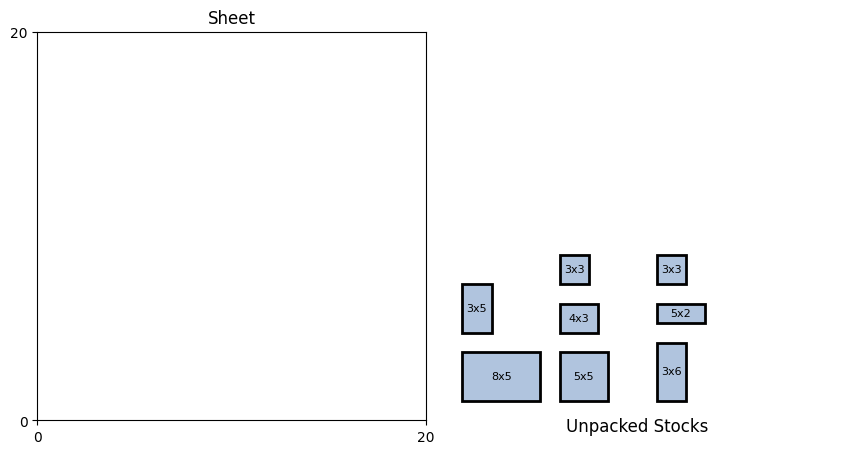

In [3]:
from visualization import VisualSheet
from stock import Stock, Sheet

stocks = [
    Stock(5, 2),
    Stock(3, 5),
    Stock(4, 3),
    Stock(3, 3),
    Stock(8, 5),
    Stock(5, 5),
    Stock(3, 3),
    Stock(3, 6),
]

sheet = Sheet(20, 20, stocks=stocks)

visual_sheet = VisualSheet(sheet)
visual_sheet.draw(unpacked=True)

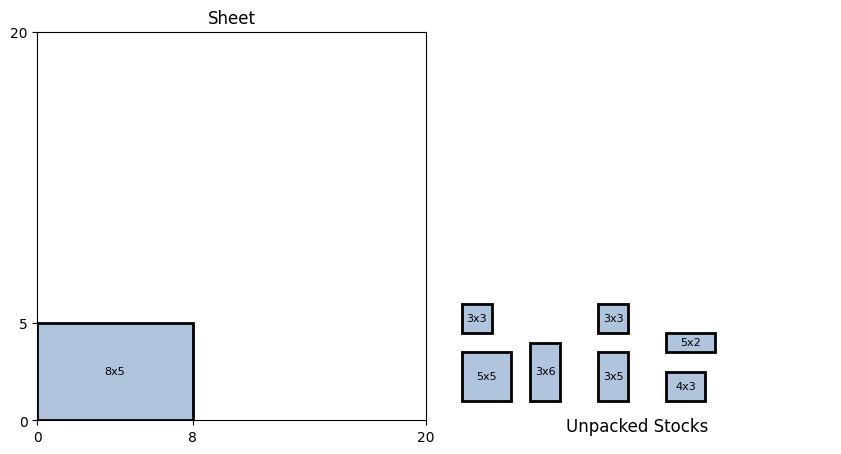

In [4]:
sheet.packNext((0, 0))
VisualSheet(sheet).draw(unpacked=True)

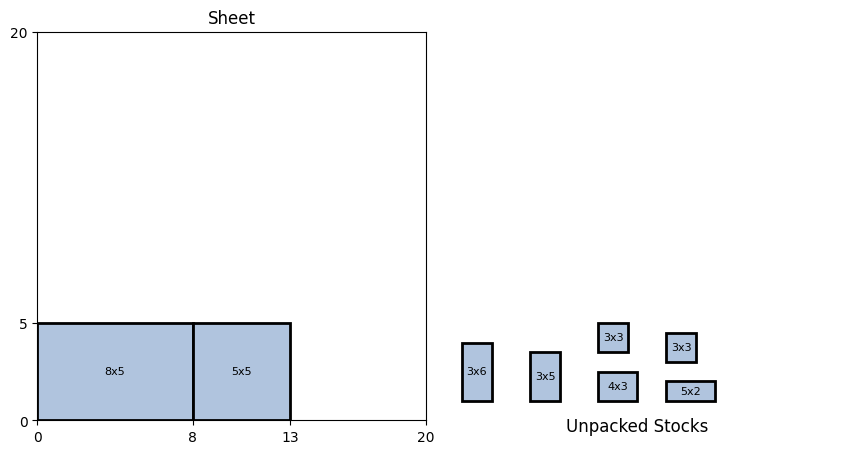

In [5]:
sheet.packNext((8, 0))
VisualSheet(sheet).draw(unpacked=True)

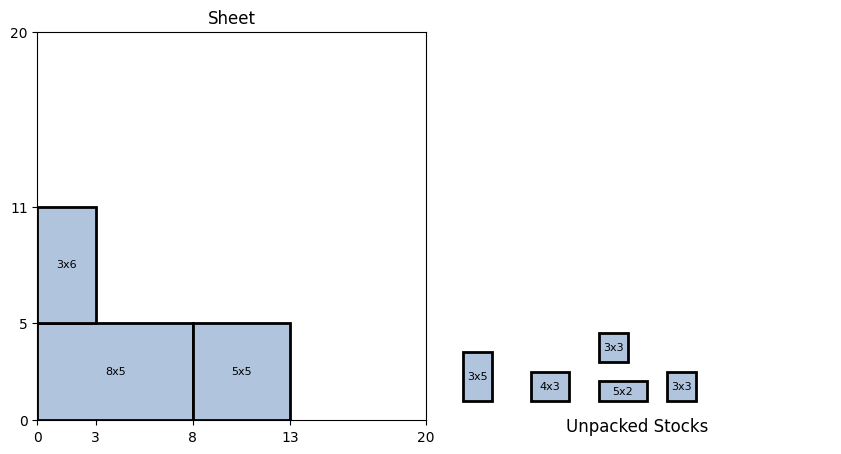

In [6]:
sheet.packNext((0, 5))
VisualSheet(sheet).draw(unpacked=True)

## Algorithm

success


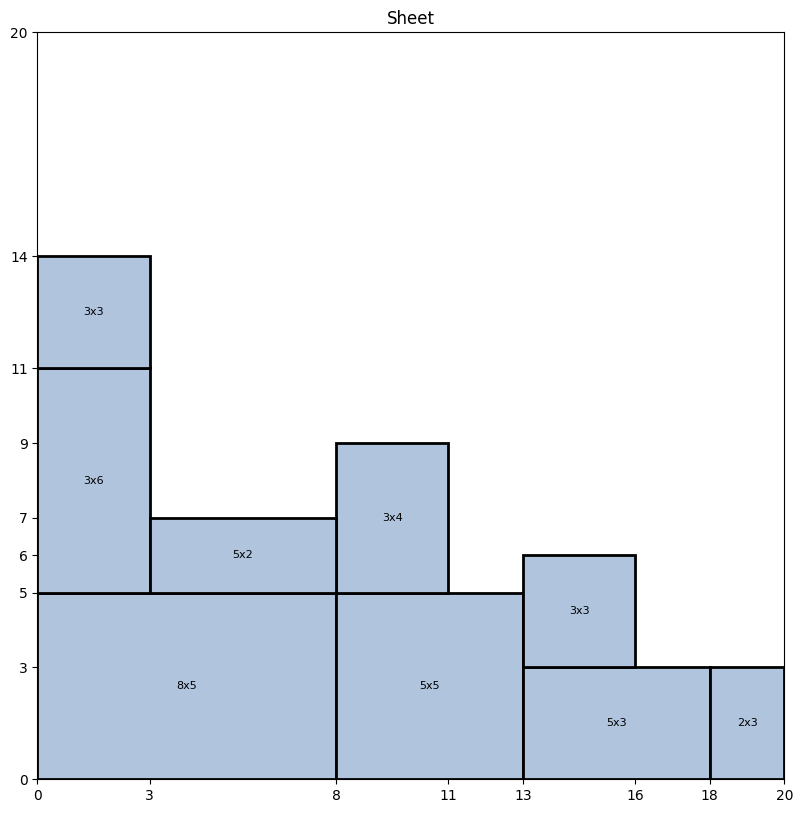

In [7]:
from algorithm import cutting_stock_problem

sheet = Sheet(20, 20)
stocks = [
    Stock(5, 2),
    Stock(3, 5),
    Stock(4, 3),
    Stock(3, 3),
    Stock(8, 5),
    Stock(5, 5),
    Stock(3, 3),
    Stock(3, 6),
    Stock(3, 2),
]
sheet.addStocks(stocks)

if cutting_stock_problem(sheet):
    print('success')
else:
    print('failed')

VisualSheet(sheet).draw()


success


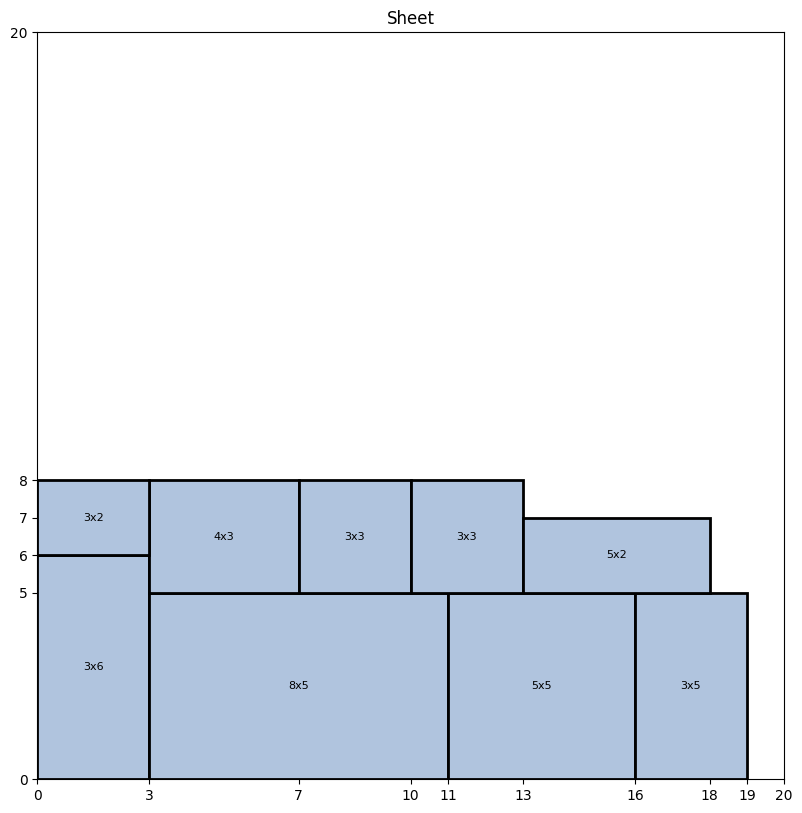

In [8]:
from algorithm import bin_packing_BLF

sheet = Sheet(20, 20)
stocks = [
    Stock(5, 2),
    Stock(3, 5),
    Stock(4, 3),
    Stock(3, 3),
    Stock(8, 5),
    Stock(5, 5),
    Stock(3, 3),
    Stock(3, 6),
    Stock(3, 2),
]
sheet.addStocks(stocks)

if bin_packing_BLF(sheet):
    print('success')
else:
    print('failed')

VisualSheet(sheet).draw()

## Benchmarks and tests

Sheet: 20x20
17


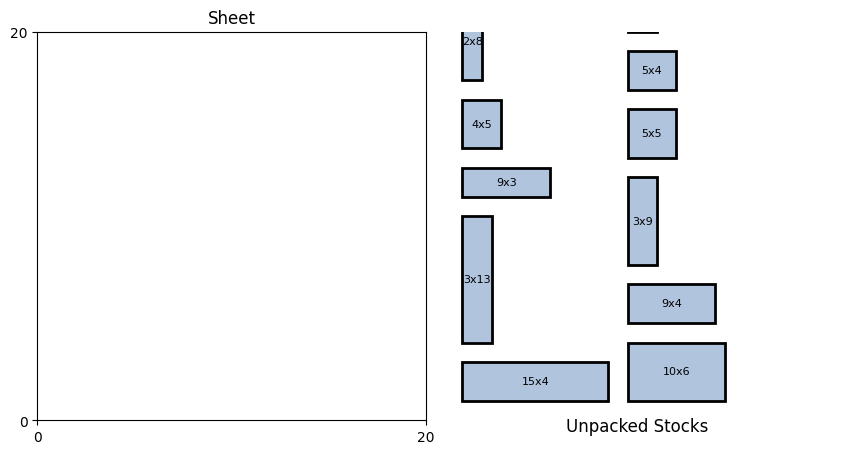

In [9]:
dataset_dir = 'Original_Hopper_Turton/'
problem_id = 'C1_2'
with open(dataset_dir+problem_id, 'r') as f:
    # the first line is the number of stocks
    num_stocks = int(f.readline())
    # the second line is the size of the sheet
    sheet_size = f.readline().strip().split(' ')
    sheet = Sheet(int(sheet_size[0]), int(sheet_size[1]))
    # the rest of the lines are the stocks
    stocks = []
    for i in range(num_stocks):
        stock_size = f.readline().strip().split(' ')
        stocks.append(Stock(int(stock_size[0]), int(stock_size[1])))
    # print(stocks)

    sheet.addStocks(stocks)
            
    print(sheet)
    print(len(sheet.unpacked_stocks))
    VisualSheet(sheet).draw(unpacked=True)

{'width': 20, 'height': 20, 'lower_bound_height': 20, 'area': 400, 'area_used': 364, 'efficiency': 0.91, 'num_unpacked_stocks': 1}


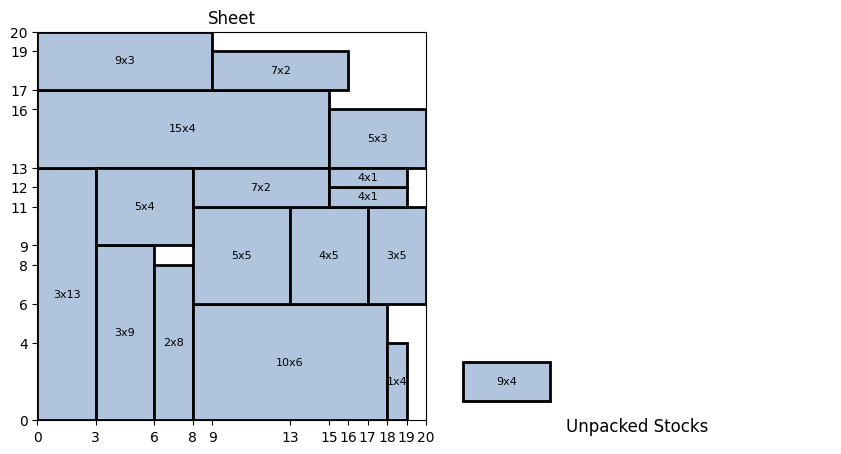

In [10]:
from algorithm import bin_packing_BLF

bin_packing_BLF(sheet)
print(sheet.getStats())

    
VisualSheet(sheet).draw(unpacked=True)

['C2_2', 'C6_3', 'C2_3', 'C4_1', 'C6_2', 'C5_3', 'C1_2', 'C3_1', 'C7_1', 'C5_2', 'C1_3', 'C4_3', 'C2_1', 'C4_2', 'C6_1', 'C1_1', 'C3_2', 'C7_3', 'C3_3', 'C7_2', 'C5_1']
----C2_2----
failed
{'width': 60, 'height': 30, 'lower_bound_height': 29, 'area': 1800, 'area_used': 1539, 'efficiency': 0.855, 'num_unpacked_stocks': 4}


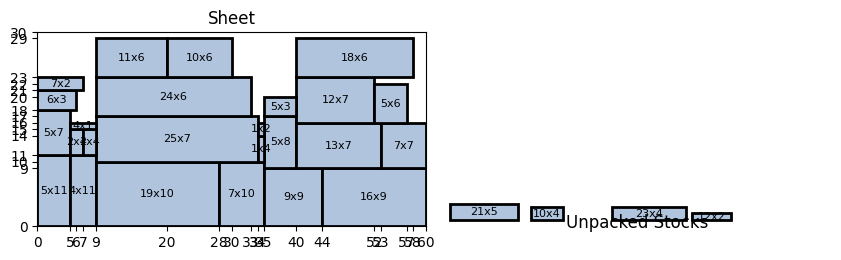

----C6_3----
failed
{'width': 80, 'height': 120, 'lower_bound_height': 120, 'area': 9600, 'area_used': 9193, 'efficiency': 0.9576041666666667, 'num_unpacked_stocks': 5}


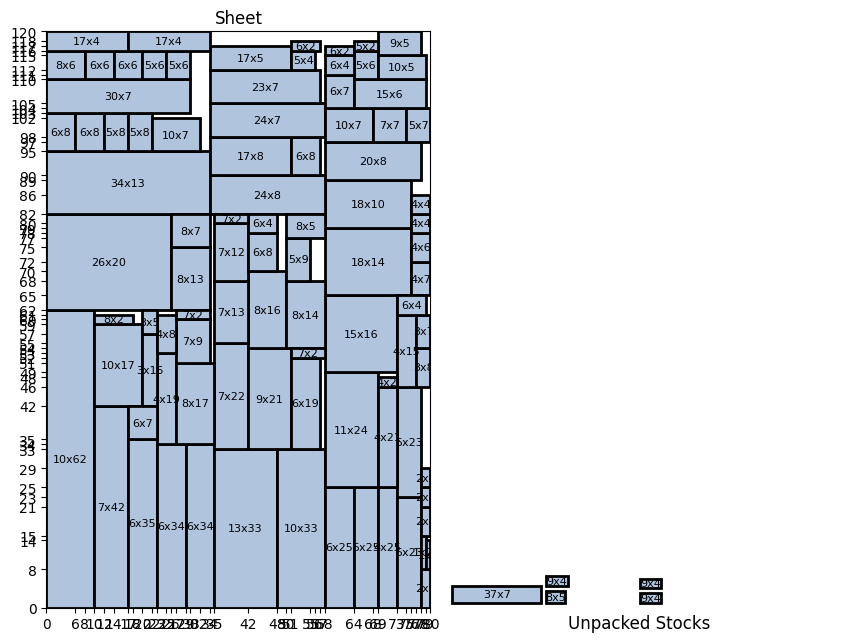

----C2_3----
failed
{'width': 60, 'height': 30, 'lower_bound_height': 30, 'area': 1800, 'area_used': 1656, 'efficiency': 0.92, 'num_unpacked_stocks': 2}


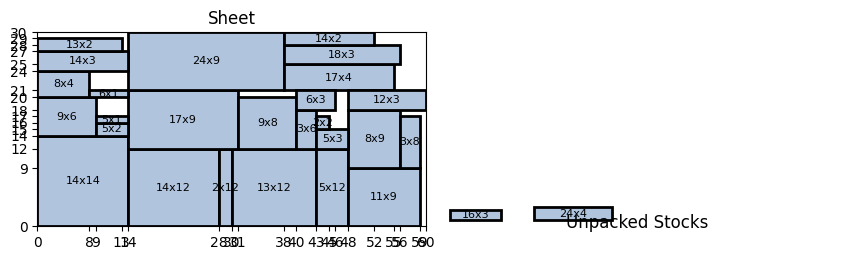

----C4_1----
failed
{'width': 60, 'height': 60, 'lower_bound_height': 60, 'area': 3600, 'area_used': 3118, 'efficiency': 0.8661111111111112, 'num_unpacked_stocks': 6}


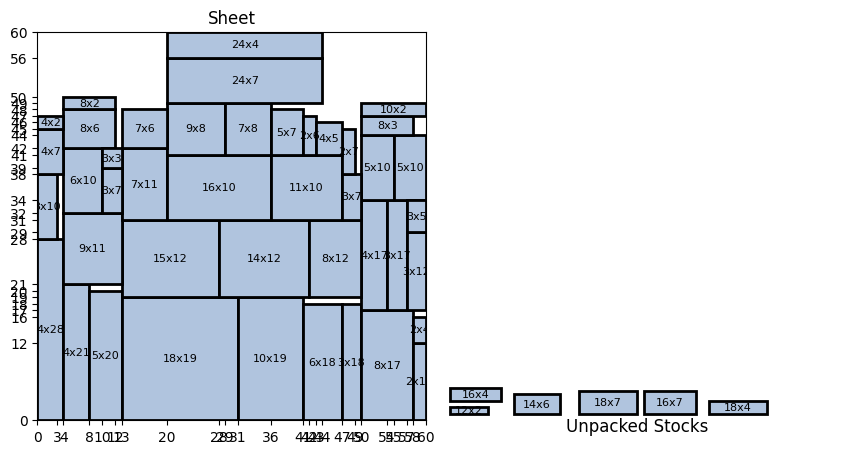

----C6_2----
failed
{'width': 80, 'height': 120, 'lower_bound_height': 87, 'area': 9600, 'area_used': 6668, 'efficiency': 0.6945833333333333, 'num_unpacked_stocks': 19}


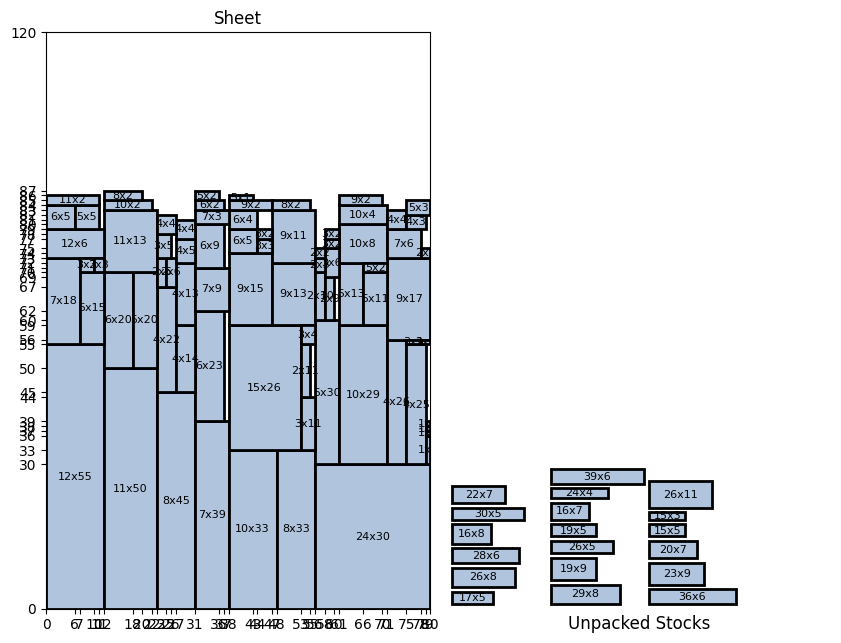

----C5_3----
failed
{'width': 60, 'height': 90, 'lower_bound_height': 90, 'area': 5400, 'area_used': 4829, 'efficiency': 0.8942592592592593, 'num_unpacked_stocks': 7}


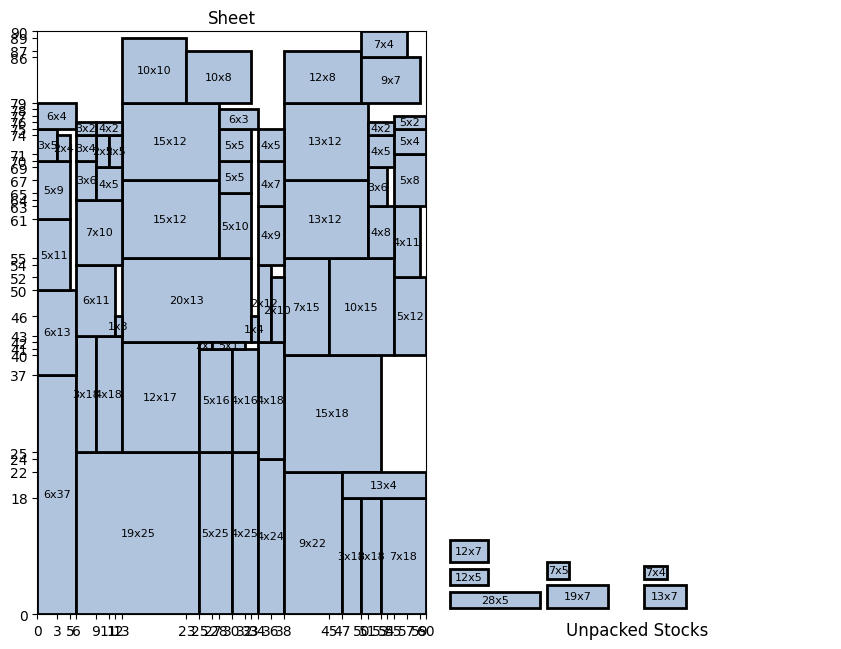

----C1_2----
failed
{'width': 20, 'height': 20, 'lower_bound_height': 20, 'area': 400, 'area_used': 364, 'efficiency': 0.91, 'num_unpacked_stocks': 1}


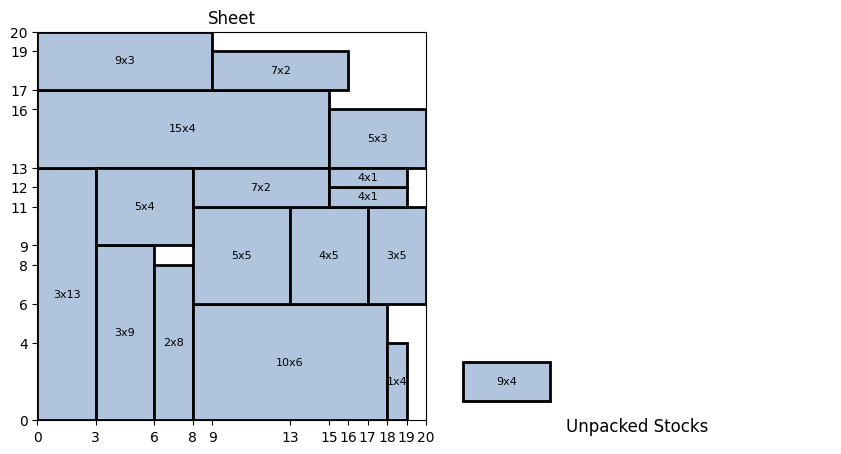

----C3_1----
failed
{'width': 40, 'height': 15, 'lower_bound_height': 15, 'area': 600, 'area_used': 530, 'efficiency': 0.8833333333333333, 'num_unpacked_stocks': 3}


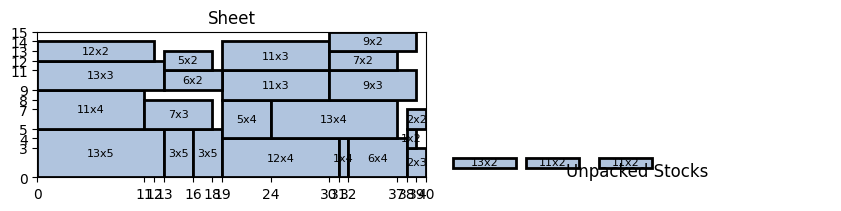

----C7_1----
failed
{'width': 160, 'height': 240, 'lower_bound_height': 240, 'area': 38400, 'area_used': 35107, 'efficiency': 0.9142447916666666, 'num_unpacked_stocks': 12}


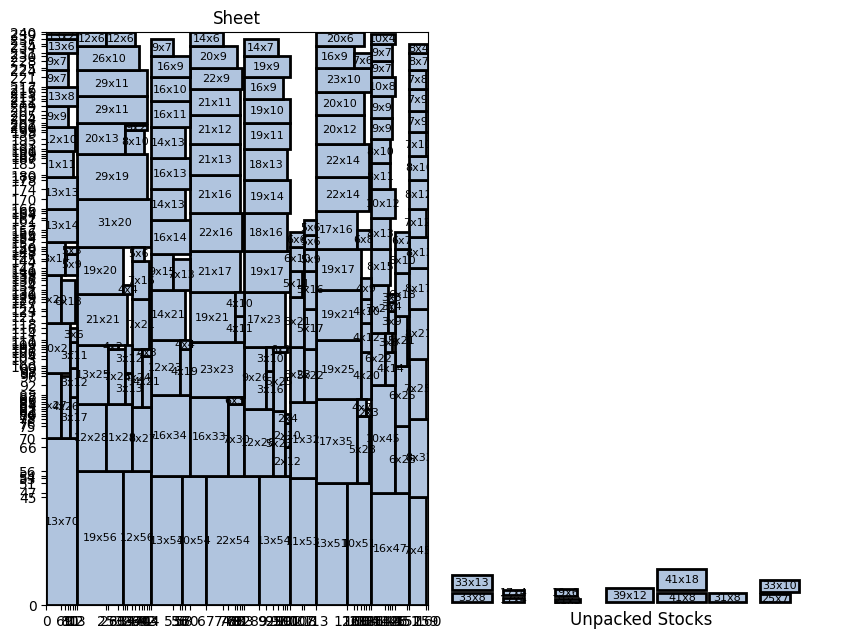

----C5_2----
failed
{'width': 60, 'height': 90, 'lower_bound_height': 80, 'area': 5400, 'area_used': 4391, 'efficiency': 0.8131481481481482, 'num_unpacked_stocks': 5}


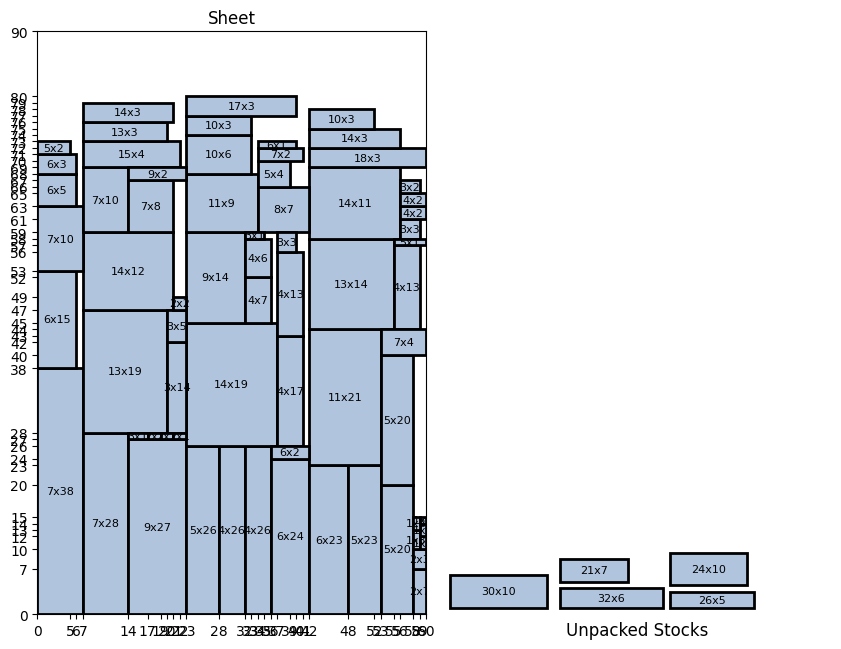

----C1_3----
failed
{'width': 20, 'height': 20, 'lower_bound_height': 20, 'area': 400, 'area_used': 370, 'efficiency': 0.925, 'num_unpacked_stocks': 1}


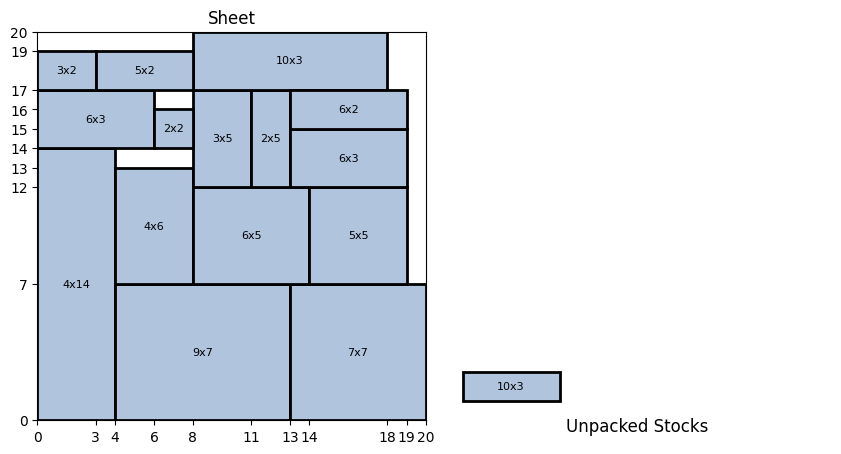

----C4_3----
failed
{'width': 60, 'height': 60, 'lower_bound_height': 60, 'area': 3600, 'area_used': 3412, 'efficiency': 0.9477777777777778, 'num_unpacked_stocks': 3}


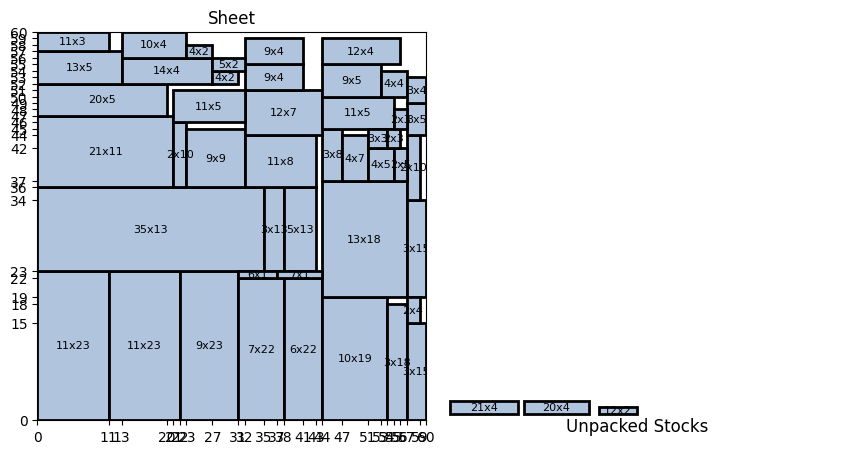

----C2_1----
failed
{'width': 60, 'height': 30, 'lower_bound_height': 30, 'area': 1800, 'area_used': 1683, 'efficiency': 0.935, 'num_unpacked_stocks': 2}


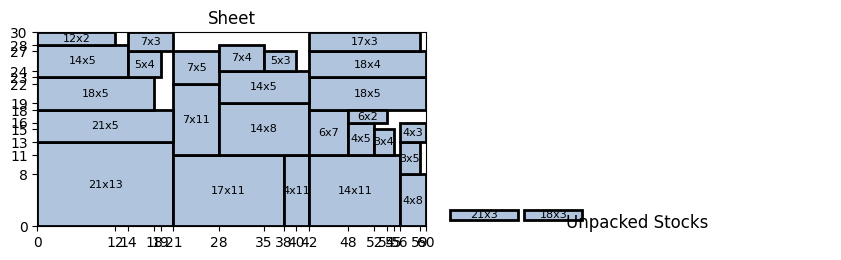

----C4_2----
failed
{'width': 60, 'height': 60, 'lower_bound_height': 59, 'area': 3600, 'area_used': 2616, 'efficiency': 0.7266666666666667, 'num_unpacked_stocks': 7}


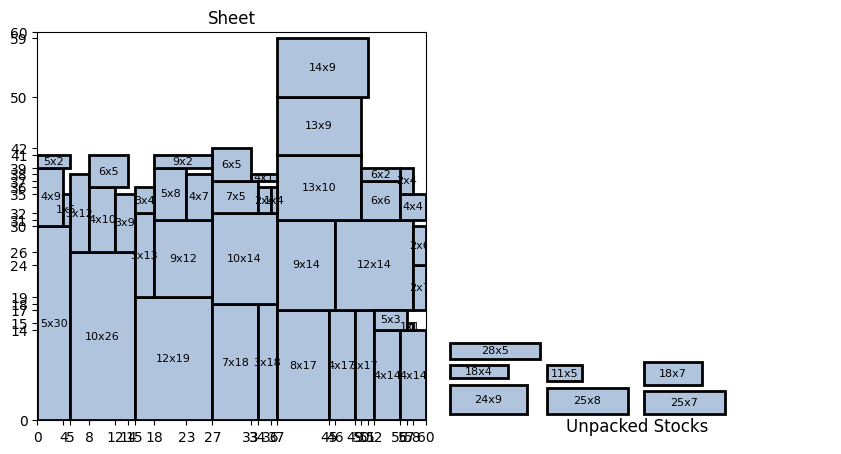

----C6_1----
failed
{'width': 80, 'height': 120, 'lower_bound_height': 120, 'area': 9600, 'area_used': 8463, 'efficiency': 0.8815625, 'num_unpacked_stocks': 8}


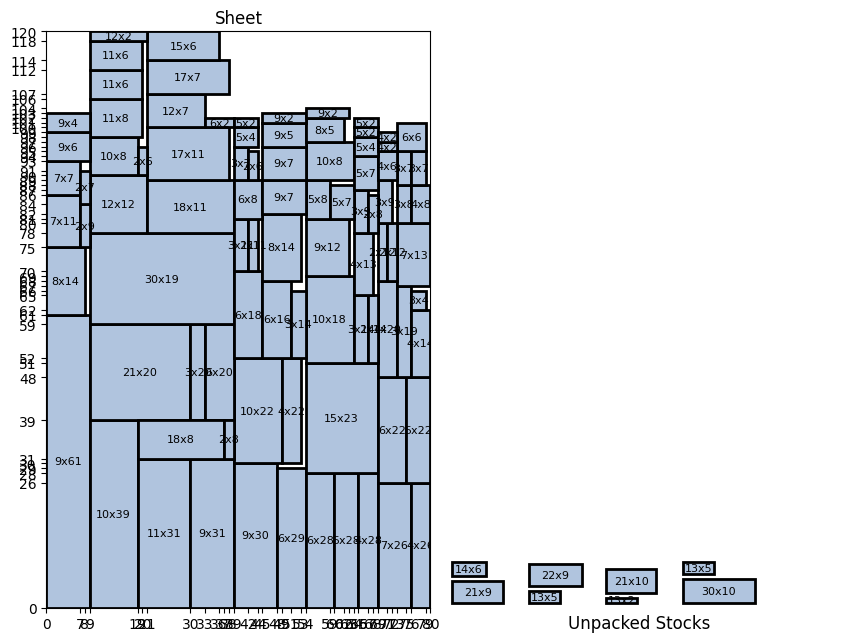

----C1_1----
failed
{'width': 20, 'height': 20, 'lower_bound_height': 20, 'area': 400, 'area_used': 382, 'efficiency': 0.955, 'num_unpacked_stocks': 1}


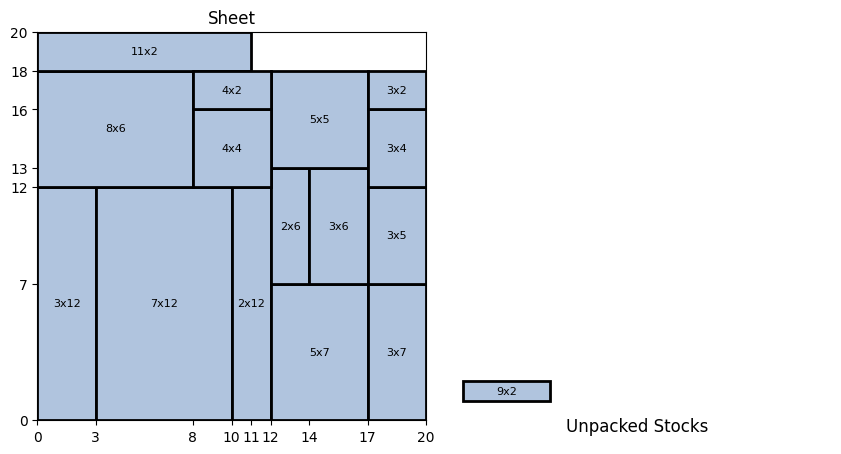

----C3_2----
failed
{'width': 40, 'height': 15, 'lower_bound_height': 15, 'area': 600, 'area_used': 578, 'efficiency': 0.9633333333333334, 'num_unpacked_stocks': 1}


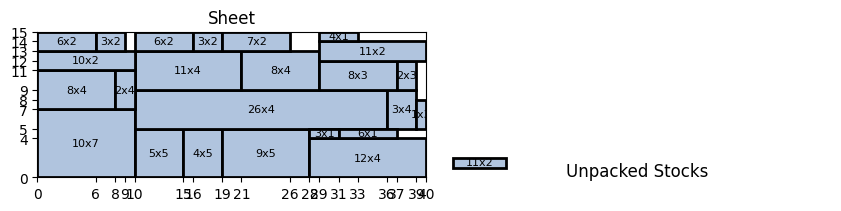

----C7_3----
failed
{'width': 160, 'height': 240, 'lower_bound_height': 239, 'area': 38400, 'area_used': 30832, 'efficiency': 0.8029166666666666, 'num_unpacked_stocks': 24}


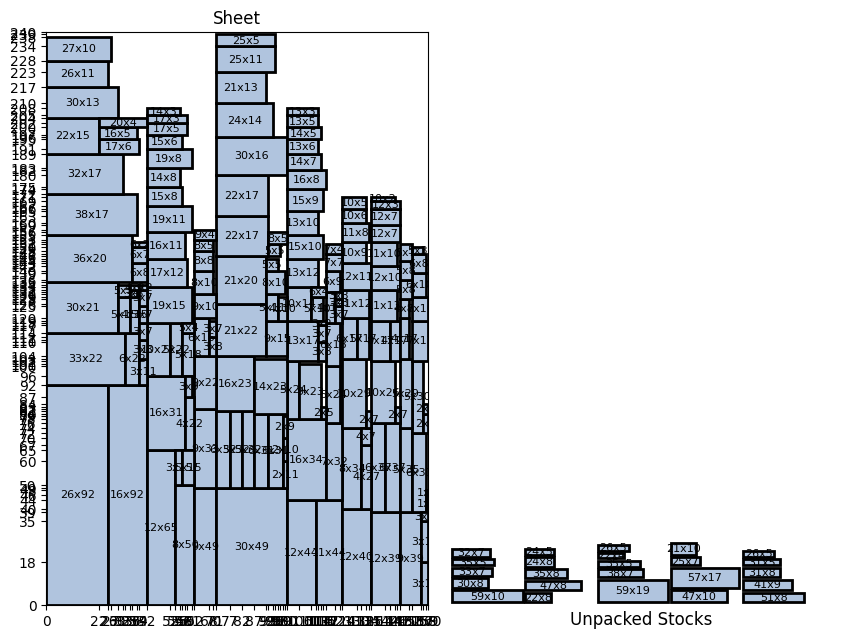

----C3_3----
failed
{'width': 40, 'height': 15, 'lower_bound_height': 15, 'area': 600, 'area_used': 583, 'efficiency': 0.9716666666666667, 'num_unpacked_stocks': 2}


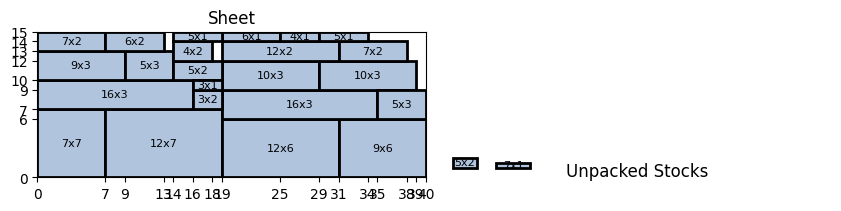

----C7_2----
failed
{'width': 160, 'height': 240, 'lower_bound_height': 223, 'area': 38400, 'area_used': 29113, 'efficiency': 0.7581510416666667, 'num_unpacked_stocks': 18}


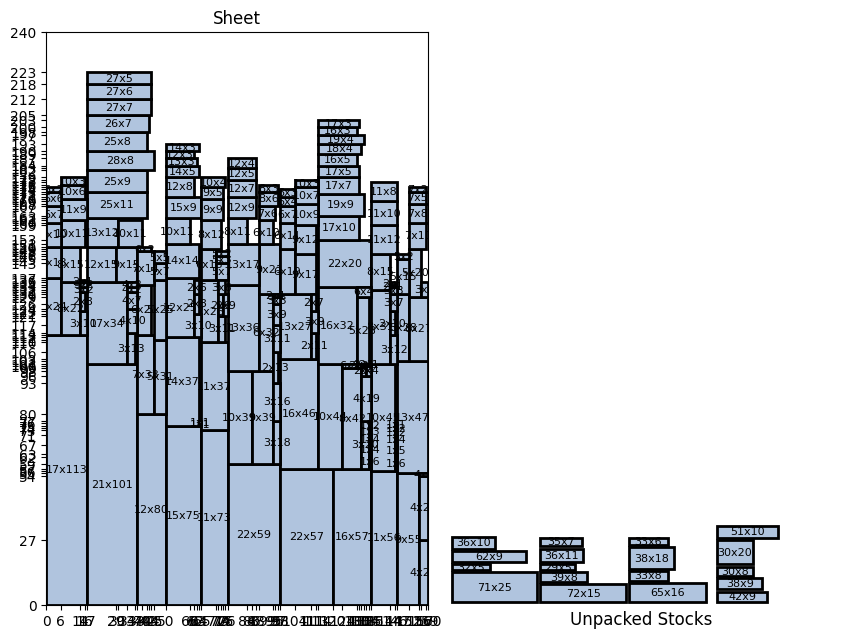

----C5_1----
failed
{'width': 60, 'height': 90, 'lower_bound_height': 90, 'area': 5400, 'area_used': 5052, 'efficiency': 0.9355555555555556, 'num_unpacked_stocks': 7}


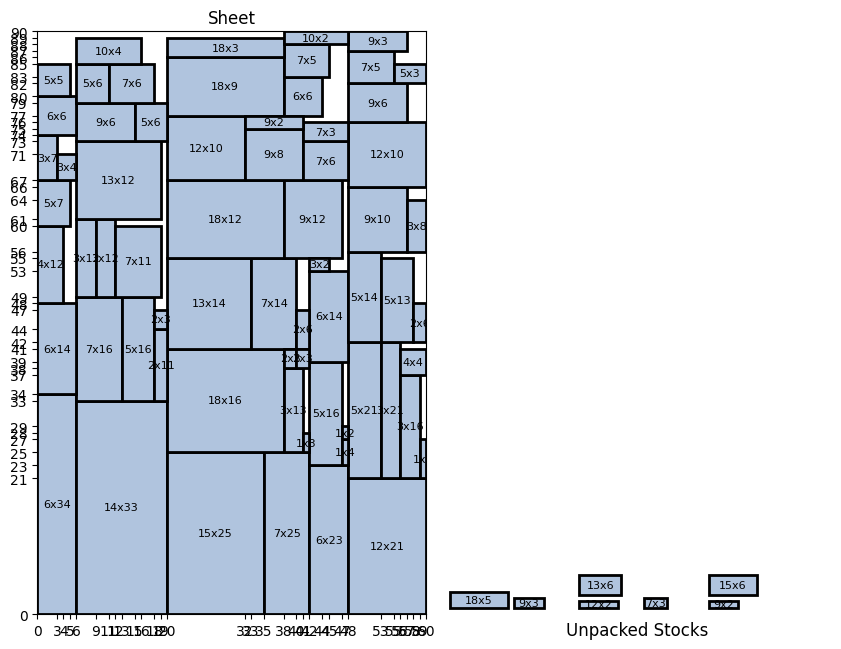

In [11]:
# read the data from the files
import os

dataset_dir = 'Original_Hopper_Turton/'
# create the output directory if it does not exist
output_dir = 'output/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
testcases = os.listdir(dataset_dir)
print(testcases)

for testcase in testcases:
    print(f"----{testcase}----")
    
    with open(dataset_dir + testcase, 'r') as f:
        # the first line is the number of stocks
        num_stocks = int(f.readline())
        # the second line is the size of the sheet
        sheet_size = f.readline().split()
        sheet = Sheet(int(sheet_size[0]), int(sheet_size[1]))
        # the rest of the lines are the stocks
        for i in range(num_stocks):
            stock_size = f.readline().split()
            sheet.addStock(Stock(int(stock_size[0]), int(stock_size[1])))


    if bin_packing_BLF(sheet):
        print('success')
    else:
        print('failed')
    print(sheet.getStats())

    VisualSheet(sheet).draw(unpacked=True)
    del sheet
    f.close()
